In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pickle

In [7]:
mnist = datasets.fetch_openml('mnist_784', version=1)
    
X, y = mnist['data'], mnist['target']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_test, y_train, y_test = np.array(X_train).reshape(-1, 1, 784), np.array(X_test).reshape(-1, 1, 784), np.array(y_train, dtype=int), np.array(y_test, dtype=int)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 1, 784), (14000, 1, 784), (56000,), (14000,))

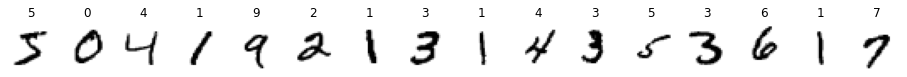

In [29]:
fig, axes = plt.subplots(1, 16, figsize=(16,8))
for i in range(16):
    axes[i].imshow(X_train[i].reshape((28,28)), cmap='gray_r')
    axes[i].axis('off')
    axes[i].set_title(y_train[i])

In [28]:
knn_clf = KNeighborsClassifier(n_neighbors=7)

In [29]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [31]:
y_pred = knn_clf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1373
           1       0.95      1.00      0.98      1569
           2       0.99      0.96      0.97      1430
           3       0.97      0.97      0.97      1413
           4       0.98      0.96      0.97      1376
           5       0.97      0.97      0.97      1253
           6       0.98      0.99      0.99      1339
           7       0.96      0.97      0.97      1483
           8       0.99      0.95      0.97      1365
           9       0.96      0.96      0.96      1399

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



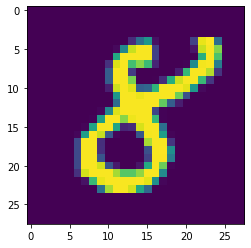

array(['8'], dtype=object)

In [26]:
ex = X_test.iloc[1].to_numpy().reshape(28, 28)
plt.imshow(ex)
plt.show()

knn_clf.predict(ex.reshape(1, -1))

In [32]:
pickle.dump(knn_clf, open('models/knn_clf.sav', 'wb'))

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [83]:
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.6, shuffle=False)
X_test, X_val, y_test, y_val = np.array(X_test).reshape(-1, 1, 784), np.array(X_val).reshape(-1, 1, 784), np.array(y_test, dtype=int), np.array(y_val, dtype=int)

In [91]:
model = Sequential([
    Flatten(),
    Dense(128, input_shape=(1, 728), activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [85]:
model.compile(optimizer=SGD(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=7,
          validation_data=(X_val, y_val))

Epoch 1/7
1750/1750 [==============================] - 3s 1ms/step - loss: 4.7166 - accuracy: 0.7125 - val_loss: 0.4975 - val_accuracy: 0.8732
Epoch 2/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.4659 - accuracy: 0.8796 - val_loss: 0.3653 - val_accuracy: 0.9033
Epoch 3/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3423 - accuracy: 0.9080 - val_loss: 0.3100 - val_accuracy: 0.9178
Epoch 4/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2906 - accuracy: 0.9203 - val_loss: 0.2722 - val_accuracy: 0.9275
Epoch 5/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2458 - accuracy: 0.9321 - val_loss: 0.2445 - val_accuracy: 0.9336
Epoch 6/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2133 - accuracy: 0.9385 - val_loss: 0.2198 - val_accuracy: 0.9399
Epoch 7/7
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1953 - accuracy: 0.9434 - val_loss: 0.2195 - val_accuracy: 0.9419

## SGD(learning rate=0.001, epochs=4) :: loss: 0.1953 - accuracy: 0.9434 - val_loss: 0.2195 - val_accuracy: 0.9419

In [92]:
# Reinitialize model before executing
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8,
          validation_data=(X_val, y_val))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5,
          validation_data=(X_val, y_val))

Epoch 1/8
1750/1750 [==============================] - 3s 2ms/step - loss: 4.2425 - accuracy: 0.8105 - val_loss: 0.4053 - val_accuracy: 0.9211
Epoch 2/8
1750/1750 [==============================] - 2s 1ms/step - loss: 0.3552 - accuracy: 0.9269 - val_loss: 0.2156 - val_accuracy: 0.9473
Epoch 3/8
1750/1750 [==============================] - 2s 1ms/step - loss: 0.2146 - accuracy: 0.9444 - val_loss: 0.1719 - val_accuracy: 0.9530
Epoch 4/8
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1645 - accuracy: 0.9553 - val_loss: 0.1267 - val_accuracy: 0.9637
Epoch 5/8
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1459 - accuracy: 0.9590 - val_loss: 0.1214 - val_accuracy: 0.9660
Epoch 6/8
1750/1750 [==============================] - 3s 1ms/step - loss: 0.1173 - accuracy: 0.9670 - val_loss: 0.1547 - val_accuracy: 0.9584
Epoch 7/8
1750/1750 [==============================] - 2s 1ms/step - loss: 0.1213 - accuracy: 0.9653 - val_loss: 0.1301 - val_accuracy: 0.9627

In [93]:
model.save('models/dl_clf.h5')